# **1. Import Library**

Beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# from google.colab import drive

# **2. Memuat Dataset dari Hasil Clustering**

## 1. Memuat dataset hasil clustering dari file hasil_clustering.CSV ke dalam variabel DataFrame.

In [3]:
# drive.mount('/content/drive')

In [4]:
product_df = pd.read_csv("dataset/hasil_clustering.csv")
product_df.head()

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,payment_made,product_volume_cm3,product_complexity,order_status_encoded,cluster_category
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,perfumery,2018-07,13.0,5.0,1.0,11.732500,208.0,delivered,0
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5.0,auto,2018-08,9.0,17.0,0.0,22.800000,279.0,delivered,1
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,pet_shop,2017-11,13.0,12.0,1.0,13.333333,530.0,delivered,0
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,59.99,15.17,07d67dd06ed5f88bef11ef6b464e79ae,5.0,auto,2017-05,9.0,11.0,0.0,30.095238,1016.0,delivered,1
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,19.90,16.05,fc4af8aea8ec3f1a3cd181d3d0cadbd5,2.5,furniture_decor,2017-01,9.0,31.0,1.0,30.095238,475.0,delivered,0


In [5]:
# product_df = pd.read_csv("/content/drive/MyDrive/dataset/Dicoding/hasil_clustering.csv")
# product_df.head()

## 2. Mengecek tipe data

In [6]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58765 entries, 0 to 58764
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       58765 non-null  object 
 1   customer_id                    58765 non-null  object 
 2   order_status                   58765 non-null  object 
 3   order_item_id                  58765 non-null  int64  
 4   product_id                     58765 non-null  object 
 5   price                          58765 non-null  float64
 6   freight_value                  58765 non-null  float64
 7   review_id                      58765 non-null  object 
 8   review_score                   58765 non-null  float64
 9   product_category_name_english  58765 non-null  object 
 10  order_purchase_date            58765 non-null  object 
 11  shipping_duration_days         58765 non-null  float64
 12  delivery_accuracy_days         58765 non-null 

## 3. Mengecek Distribusi Data

In [7]:
print(f"Dataset memiliki {product_df.shape[0]} baris dan {product_df.shape[1]} kolom.\n")

Dataset memiliki 58765 baris dan 18 kolom.



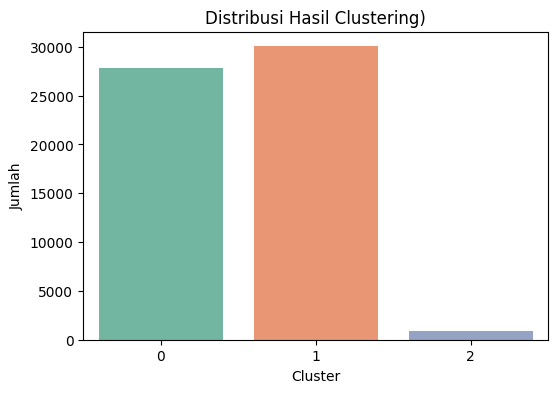

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=product_df, x='cluster_category', palette='Set2', hue='cluster_category', dodge=False, legend=False)
plt.title('Distribusi Hasil Clustering)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.show()

# 3. **Merapihkan Data**  

Karena sebelumnya pakai dataset (hasil_clustering.csv) yang sudah di invers pada tahap akhirnya, jadi akan dilakukan beberapa tahap teknik Preprocessing data kembali

## 1. Mengecek Missing Value Kembali

In [9]:
product_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
review_id                        0
review_score                     0
product_category_name_english    0
order_purchase_date              0
shipping_duration_days           0
delivery_accuracy_days           0
payment_made                     0
product_volume_cm3               0
product_complexity               0
order_status_encoded             0
cluster_category                 0
dtype: int64

aman, tidak ada missing value, jadi data tidak berubah ya ✅

## 2. Mengecek Duplikasi Data Kembali

In [10]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


aman, tidak ada duplikasi data, jadi data tidak berubah ya ✅

## 3. Melakukan Normalisasi atau Standarisasi Fitur Kembali

In [11]:
num_features = ['price', 'freight_value', 'review_score', 'shipping_duration_days', 'product_complexity', 'delivery_accuracy_days', 'payment_made', 'product_volume_cm3']

scaler = MinMaxScaler()
product_df[num_features] = scaler.fit_transform(product_df[num_features])

In [12]:
product_df.head()

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,payment_made,product_volume_cm3,product_complexity,order_status_encoded,cluster_category
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,0.477222,0.681463,8d5266042046a06655c8db133d120ba5,0.6,perfumery,2018-07,0.440678,0.325,1.0,0.389404,0.089435,delivered,0
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,0.644058,0.561054,e73b67b67587f7644d5bd1a52deb1b01,1.0,auto,2018-08,0.305085,0.625,0.0,0.757419,0.126569,delivered,1
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,0.178781,0.832483,359d03e676b3c069f62cadba8dd3f6e8,1.0,pet_shop,2017-11,0.440678,0.500,1.0,0.442634,0.257845,delivered,0
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,0.239482,0.423299,07d67dd06ed5f88bef11ef6b464e79ae,1.0,auto,2017-05,0.305085,0.475,0.0,1.000000,0.512029,delivered,1
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,0.077141,0.453231,fc4af8aea8ec3f1a3cd181d3d0cadbd5,0.0,furniture_decor,2017-01,0.305085,0.975,1.0,1.000000,0.229079,delivered,0


## 4. Melakukan Deteksi dan Penanganan Outlier Kembali

In [13]:
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

In [14]:
product_df = handle_outliers(product_df, num_features)
product_df[num_features].head()

,price,freight_value,review_score,shipping_duration_days,product_complexity,delivery_accuracy_days,payment_made,product_volume_cm3
0,0.477222,0.681463,6.000000e-01,0.440678,0.089435,0.325,1.0,0.389404
1,0.644058,0.561054,1.000000e+00,0.305085,0.126569,0.625,0.0,0.757419
2,0.178781,0.832483,1.000000e+00,0.440678,0.257845,0.500,1.0,0.442634
3,0.239482,0.423299,1.000000e+00,0.305085,0.512029,0.475,0.0,1.000000
4,0.077141,0.453231,2.220446e-16,0.305085,0.229079,0.975,1.0,1.000000


## 5. Mengecek Binning Data Kembali

In [15]:
print(product_df['order_status_encoded'].unique())

['delivered' 'shipped' 'canceled' 'process']


## 6. Melakukan Label Encoder Kembali

In [16]:
label_encoder = LabelEncoder()
product_df['order_status_encoded'] = label_encoder.fit_transform(product_df['order_status_encoded'])

In [17]:
print(product_df['order_status_encoded'].unique())

[1 3 0 2]


In [18]:
product_df.head()

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,payment_made,product_volume_cm3,product_complexity,order_status_encoded,cluster_category
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,0.477222,0.681463,8d5266042046a06655c8db133d120ba5,6.000000e-01,perfumery,2018-07,0.440678,0.325,1.0,0.389404,0.089435,1,0
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,0.644058,0.561054,e73b67b67587f7644d5bd1a52deb1b01,1.000000e+00,auto,2018-08,0.305085,0.625,0.0,0.757419,0.126569,1,1
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,0.178781,0.832483,359d03e676b3c069f62cadba8dd3f6e8,1.000000e+00,pet_shop,2017-11,0.440678,0.500,1.0,0.442634,0.257845,1,0
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,0.239482,0.423299,07d67dd06ed5f88bef11ef6b464e79ae,1.000000e+00,auto,2017-05,0.305085,0.475,0.0,1.000000,0.512029,1,1
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,0.077141,0.453231,fc4af8aea8ec3f1a3cd181d3d0cadbd5,2.220446e-16,furniture_decor,2017-01,0.305085,0.975,1.0,1.000000,0.229079,1,0


# **4. Data Splitting**

Pertanyaan Bisnis yang Diambil

Supervised Learning: **Produk mana yang berpotensi untuk lebih laku berdasarkan karakteristik yang telah dikelompokkan?** ✅

## 1. Menentukan Variabel Y (Dependent Variable)

Untuk pemilihan data, dibagi menjadi fitur X (variabel independen) dan target y (variabel dependen).Pembagian ini memastikan model dilatih menggunakan fitur yang relavan sehingga hasil prediksi menjadi lebih akurat.


In [19]:
cluster_stats = product_df.groupby('cluster_category').agg({
    'delivery_accuracy_days': lambda x: x.quantile(0.75),
    'review_score': 'mean'
})

cluster_stats.columns = ['delivery_accuracy_days', 'review_score']
cluster_stats

,delivery_accuracy_days,review_score
cluster_category,,
0,0.600,0.730952
1,0.625,0.714086
2,0.675,0.143805


Metode assign digunakan untuk mengklasifikasikan produk berdasarkan aturan logis yang didasarkan pada karakteristik skor ulasan dan akurasi pengiriman. Pendekatan ini memungkinkan identifikasi produk yang berpotensi laku atau tidak laku secara cepat, memberikan dasar analisis sebelum menerapkan model prediktif yang lebih kompleks.

In [20]:
def assign_popularity(row):
    cluster_threshold = cluster_stats.loc[row['cluster_category'], 'delivery_accuracy_days']
    review_threshold = cluster_stats.loc[row['cluster_category'], 'review_score']
    if row['delivery_accuracy_days'] >= cluster_threshold and row['review_score'] < review_threshold:
        return '0'  # (produk dengan pengiriman lama + review rendah)
    elif row['delivery_accuracy_days'] >= cluster_threshold * 0.85 and row['review_score'] >= review_threshold:
        return '1'  # (produk dengan pengiriman cukup cepat + review tinggi)
    else:
        return '2'  # (produk dengan pengiriman cepat + review tinggi)

product_df['popular'] = product_df.apply(assign_popularity, axis=1)

## 2. Menentukan Variabel x (Independent Variables)

In [21]:
all_features = [
  'price',
  'freight_value',
  'review_score',
  'shipping_duration_days',
  'delivery_accuracy_days',
  'product_complexity',
  'order_status_encoded'
]

X = product_df[all_features]
y = product_df['popular']

## 3. Membagi Distribusi Data

Data dibagi menjadi 80% data latih, dan 20% data prediksi

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Melihat Distribusi Data Latih

In [23]:
train_distribution = y_train.value_counts()
print("Distribusi Target pada Training Set:")
train_distribution

Distribusi Target pada Training Set:


popular
2    29729
1    12664
0     4619
Name: count, dtype: int64

## 5. Melihat Distribusi Data Prediksi

In [24]:
test_distribution = y_test.value_counts()
print("\nDistribusi Target pada Test Set:")
test_distribution


Distribusi Target pada Test Set:


popular
2    7339
1    3195
0    1219
Name: count, dtype: int64

# **5. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Pada proses klasifikasi supervised learning ini, dibandingan 2 algoritma machine learning supervised, yaitu Logistic regression dan support vector machine (SVM) untuk melihat perporma 2 algoritma tersebut dalam mempelajari dan memprediksi data.

### 1. Menerapkan Logistic Regression Untuk Data Latih

In [25]:
logreg_model = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [26]:
y_train_pred_logreg = logreg_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred_logreg)
print(f"Akurasi pada data latih menggunakan Logistic Regresi: {accuracy_train:.4f}%")

Akurasi pada data latih menggunakan Logistic Regresi: 0.9653%


### 2. Laporan Performa Logistic Regression Pada Data Latih

In [27]:
report_train = classification_report(y_train, y_train_pred_logreg)
print("Classification Report untuk Data Latih menggunakan Logistic Regresi:")
print(report_train)

Classification Report untuk Data Latih menggunakan Logistic Regresi:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4619
           1       0.92      1.00      0.96     12664
           2       1.00      0.95      0.97     29729

    accuracy                           0.97     47012
   macro avg       0.94      0.98      0.96     47012
weighted avg       0.97      0.97      0.97     47012



### 3. Menerapkan SVM Untuk Data Latih

In [28]:
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [29]:
y_train_pred_svm = svm_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred_svm)
print(f"Akurasi pada data latih menggunakan SVM: {accuracy_train:.4f}")

Akurasi pada data latih menggunakan SVM: 0.9608


### 3. Laporan Performa SVM Pada Data Latih

In [30]:
report_train = classification_report(y_train, y_train_pred_svm)
print("Classification Report untuk Data Latih menggunakan SVM:")
print(report_train)

Classification Report untuk Data Latih menggunakan SVM:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4619
           1       0.92      1.00      0.96     12664
           2       1.00      0.94      0.97     29729

    accuracy                           0.96     47012
   macro avg       0.93      0.98      0.95     47012
weighted avg       0.96      0.96      0.96     47012



## **b. Evaluasi Model Klasifikasi**

### 1. Menerapkan Logistic Regression Untuk Data Uji

In [31]:
y_test_pred_logreg = logreg_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_logreg)
print(f"Akurasi pada data uji menggunakan Logistic Regresi: {accuracy_test:.4f}%")

Akurasi pada data uji menggunakan Logistic Regresi: 0.9649%


### 2. Laporan Performa Logistic Regression Pada Data uji

In [32]:
report_test = classification_report(y_test, y_test_pred_logreg)
print("Classification Report untuk Data Uji menggunakan Logistic Regresi:")
print(report_test)

Classification Report untuk Data Uji menggunakan Logistic Regresi:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1219
           1       0.92      1.00      0.96      3195
           2       1.00      0.94      0.97      7339

    accuracy                           0.96     11753
   macro avg       0.94      0.98      0.96     11753
weighted avg       0.97      0.96      0.97     11753



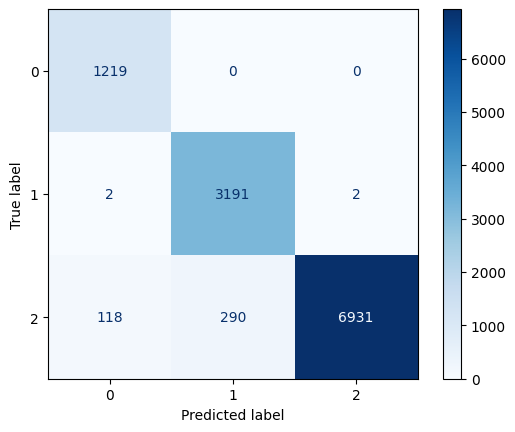

In [33]:
conf_matrix = confusion_matrix(y_test, y_test_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg_model.classes_)
disp.plot(cmap='Blues')
plt.show()

### 3. Menerapkan SVM Untuk Data Uji

In [34]:
y_test_pred_svm = svm_model.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Akurasi pada data uji menggunakan SVM: {accuracy_test_svm:.4f}")

Akurasi pada data uji menggunakan SVM: 0.9589


### 4. Laporan Performa SVM Pada Data uji

In [35]:
report_test_svm = classification_report(y_test, y_test_pred_svm)
print("Classification Report untuk Data Uji menggunakan SVM:")
print(report_test_svm)

Classification Report untuk Data Uji menggunakan SVM:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1219
           1       0.92      1.00      0.96      3195
           2       1.00      0.93      0.97      7339

    accuracy                           0.96     11753
   macro avg       0.93      0.98      0.95     11753
weighted avg       0.96      0.96      0.96     11753



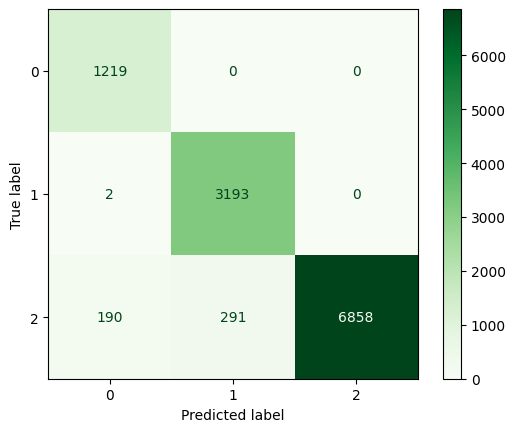

In [36]:
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Greens')
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

### 1. Menerapkan RandomizedSearchCV Pada Logistic Regression untuk mencari kombinasi hyperparameter terbaik

In [37]:
param_dist_logreg = {
    'C': [0.1, 0.5, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [500],
    'tol': [1e-4]
}

logreg_model_tuned = LogisticRegression(class_weight='balanced', random_state=42)
random_search_logreg = RandomizedSearchCV(logreg_model_tuned, param_distributions=param_dist_logreg,
                                          n_iter=5, cv=3, scoring='accuracy', random_state=42,
                                          n_jobs=-1)

random_search_logreg.fit(X_train, y_train)
print("Best Parameters:", random_search_logreg.best_params_)

Best Parameters: {'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'C': 1}


In [38]:
best_logreg_tuned = random_search_logreg.best_estimator_
y_train_pred_logreg_tuned = best_logreg_tuned.predict(X_train)
y_test_pred_logreg_tuned = best_logreg_tuned.predict(X_test)

logreg_accuracy_tuned = accuracy_score(y_test, y_test_pred_logreg_tuned)
logreg_f1_tuned = f1_score(y_test, y_test_pred_logreg_tuned, average='weighted')
logreg_precision_tuned = precision_score(y_test, y_test_pred_logreg_tuned, average='weighted')
logreg_recall_tuned = recall_score(y_test, y_test_pred_logreg_tuned, average='weighted')

print(f"\nHasil Logistic Regression Tuned dengan RandomizedSearchCV")
print(f'Logistic Regression Tuned - Akurasi: {logreg_accuracy_tuned:.4f}')
print(f'Logistic Regression Tuned - F1-Score: {logreg_f1_tuned:.4f}')
print(f'Logistic Regression Tuned - Precision: {logreg_precision_tuned:.4f}')
print(f'Logistic Regression Tuned - Recall: {logreg_recall_tuned:.4f}')


Hasil Logistic Regression Tuned dengan RandomizedSearchCV
Logistic Regression Tuned - Akurasi: 0.9715
Logistic Regression Tuned - F1-Score: 0.9716
Logistic Regression Tuned - Precision: 0.9721
Logistic Regression Tuned - Recall: 0.9715


### 2. Menerapkan RandomizedSearchCV Pada SVM untuk mencari kombinasi hyperparameter terbaik

In [39]:
param_dist = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf'],
    'class_weight': ['balanced', None]
}

svm_model_tuned = SVC(random_state=42)
random_search_svm = RandomizedSearchCV(svm_model_tuned, param_distributions=param_dist,
                                       n_iter=10, scoring='accuracy', cv=2,
                                       n_jobs=-1, random_state=42)

random_search_svm.fit(X_train, y_train)
print("Best Parameters:", random_search_svm.best_params_)

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': None, 'C': 10}


In [40]:
best_svm_tuned = random_search_svm.best_estimator_
y_train_pred_svm_tuned = best_svm_tuned.predict(X_train)
y_test_pred_svm_tuned = best_svm_tuned.predict(X_test)

svm_accuracy_tuned = accuracy_score(y_test, y_test_pred_svm_tuned)
svm_f1_tuned = f1_score(y_test, y_test_pred_svm_tuned, average='weighted')
svm_precision_tuned = precision_score(y_test, y_test_pred_svm_tuned, average='weighted')
svm_recall_tuned = recall_score(y_test, y_test_pred_svm_tuned, average='weighted')

print(f"\nHasil SVM Tuned dengan RandomizedSearchCV")
print(f'SVM Tuned - Akurasi: {svm_accuracy_tuned:.4f}')
print(f'SVM Tuned - F1-Score: {svm_f1_tuned:.4f}')
print(f'SVM Tuned - Precision: {svm_precision_tuned:.4f}')
print(f'SVM Tuned - Recall: {svm_recall_tuned:.4f}')


Hasil SVM Tuned dengan RandomizedSearchCV
SVM Tuned - Akurasi: 0.9757
SVM Tuned - F1-Score: 0.9756
SVM Tuned - Precision: 0.9757
SVM Tuned - Recall: 0.9757


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

### 1. Perbandingan Performa Algoritma Logistic Regression

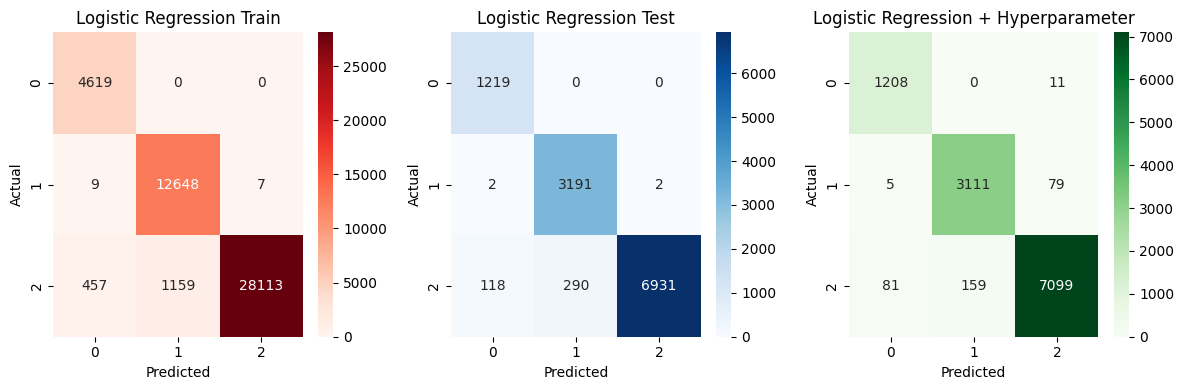

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

conf_matrix_logreg_train = confusion_matrix(y_train, y_train_pred_logreg)
sns.heatmap(conf_matrix_logreg_train, annot=True, fmt='d', cmap='Reds', xticklabels=set(y_train), yticklabels=set(y_train), ax=axes[0])
axes[0].set_title("Logistic Regression Train")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

conf_matrix_logreg = confusion_matrix(y_test, y_test_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[1])
axes[1].set_title("Logistic Regression Test")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

conf_matrix_logreg_tuned = confusion_matrix(y_test, y_test_pred_logreg_tuned)
sns.heatmap(conf_matrix_logreg_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[2])
axes[2].set_title("Logistic Regression + Hyperparameter")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [42]:
for y_true, y_pred, label in [(y_train, y_train_pred_logreg,  'Latih Logistic Regression'), (y_test, y_test_pred_logreg, 'Prediksi Logistic Regression'), (y_test, y_test_pred_logreg_tuned, 'Prediksi Logistic Regression Tuned')]:
    print(f"\nData {label}:")
    print(f"Akurasi: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")


Data Latih Logistic Regression:
Akurasi: 0.9653
Precision: 0.9682
Recall: 0.9653
F1-Score: 0.9656

Data Prediksi Logistic Regression:
Akurasi: 0.9649
Precision: 0.9679
Recall: 0.9649
F1-Score: 0.9652

Data Prediksi Logistic Regression Tuned:
Akurasi: 0.9715
Precision: 0.9721
Recall: 0.9715
F1-Score: 0.9716


### 2. Perbandingan Performa Algoritma Support Vector Machine

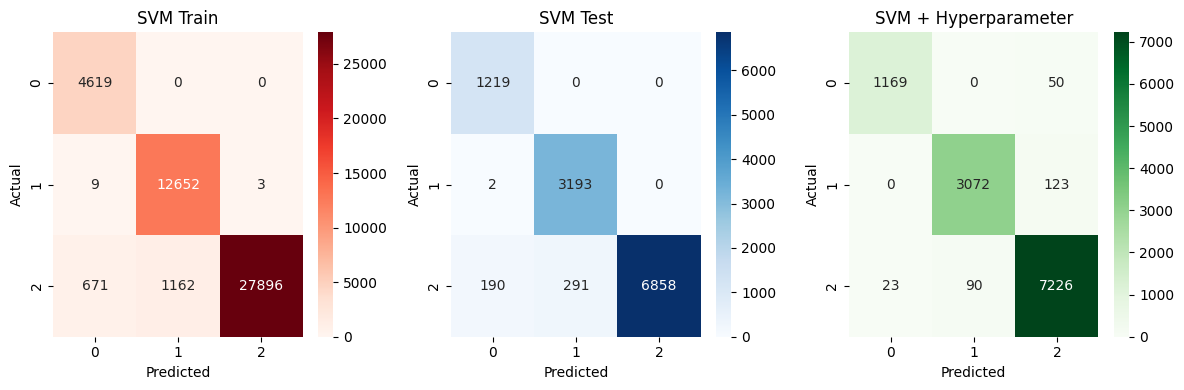

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

conf_matrix_svm_train = confusion_matrix(y_train, y_train_pred_svm)
sns.heatmap(conf_matrix_svm_train, annot=True, fmt='d', cmap='Reds', xticklabels=set(y_train), yticklabels=set(y_train), ax=axes[0])
axes[0].set_title("SVM Train")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[1])
axes[1].set_title("SVM Test")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

conf_matrix_svm_tuned = confusion_matrix(y_test, y_test_pred_svm_tuned)
sns.heatmap(conf_matrix_svm_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[2])
axes[2].set_title("SVM + Hyperparameter")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [44]:
for y_true, y_pred, label in [(y_train, y_train_pred_svm, 'Latih SVM'), (y_test, y_test_pred_svm, 'Prediksi SVM'), (y_test, y_test_pred_svm_tuned, 'Prediksi SVM Tuned')]:
    print(f"\n{label}:")
    print(f"Akurasi: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")


Latih SVM:
Akurasi: 0.9608
Precision: 0.9647
Recall: 0.9608
F1-Score: 0.9612

Prediksi SVM:
Akurasi: 0.9589
Precision: 0.9632
Recall: 0.9589
F1-Score: 0.9593

Prediksi SVM Tuned:
Akurasi: 0.9757
Precision: 0.9757
Recall: 0.9757
F1-Score: 0.9756


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### 1. Perbandingan Hasil antara Logistic Regression dan Support Vector Machine.


**Analisis Logistic Regression**

- **Perbandingan Confusion Matrix**
  * Training Set:
  1. Prediksi produk populer (kelas 1) sangat akurat: 28,106 benar vs 1,157 salah.
  2. Produk kurang populer (kelas 2) juga terprediksi dengan baik: 12,648 benar vs 9 salah.
  3. Kesalahan sangat minim, menunjukkan model belajar dengan baik.

  * Test Set:
  1. Produk populer masih dominan benar: 6,932 benar vs 287 salah.
  2. Sedikit lebih banyak kesalahan pada produk kurang populer: 3,191 benar, tapi ada 2 salah prediksi ke kelas lain.

  * Setelah Hyperparameter Tuning:
  1. Kesalahan makin berkurang: produk populer lebih akurat (7,099 benar, 159 salah).
  2. Produk kurang populer lebih presisi: 3,111 benar, hanya 79 salah.
  
  Jadi Hyperparameter membantu mengurangi bias dan meningkatkan keseimbangan prediksi antar kategori produk.

- **Evaluasi Model**
  * Tanpa Tuning, didapati Akurasi 96.50%, F1-Score 96.53%.
  * Setelah Tuning model, Akurasi meningkat ke 97.15%, F1-Score menjadi 97.16%.
  * Kesimpulan: Hyperparameter tuning meningkatkan performa dengan sedikit peningkatan akurasi dan keseimbangan antar kelas.

**Analisis Support Vector**

- **Perbandingan Confusion Matrix**
  * Training Set:
  1. Prediksi produk populer (kelas 1) sangat baik: 27,896 benar, tetapi masih ada 1,162 salah.
  2. Produk kurang populer (kelas 2) juga cukup akurat: 12,652 benar, hanya 9 salah.
  3. Kesalahan kecil, menunjukkan model belajar dengan baik.

  * Test Set:
  1. Produk populer tetap dominan benar: 6,858 benar, tetapi ada 291 salah.
  2. Produk kurang populer cukup baik: 3,193 benar, hanya 2 salah ke kelas lain.

  * Setelah Hyperparameter Tuning:
  1. Prediksi produk populer lebih akurat: 7,226 benar, hanya 90 salah.
  2. Produk kurang populer lebih stabil: 3,072 benar, tetapi ada 123 salah.
  
  Jadi Hyperparameter tuning membantu meningkatkan akurasi dan keseimbangan prediksi, terutama dalam mengurangi kesalahan pada produk populer dan mempertahankan ketepatan pada produk kurang populer.
  
- **Evaluasi Model**
  * Tanpa tuning, Akurasi cukup tinggi (±95.89%), tetapi masih ada beberapa kesalahan dalam mengklasifikasikan kelas minoritas.
  * Setelah tuning, Akurasi meningkat menjadi 97.57%, dengan Precision dan Recall yang lebih baik. Model lebih optimal dalam membedakan produk populer dan non-populer.
  * Kesimpulan: SVM dengan hyperparameter tuning memberikan hasil yang lebih baik dibandingkan sebelum tuning, terutama dalam meningkatkan klasifikasi pada kelas minoritas.

### 2. Identifikasi kelemahan model


* Indentifikasi Precision atau Recall rendah untuk kelas tertentu
* Apakah model mengalami overfitting atau underfitting?

#### Identifikasi Logictic Regression

**Kelemahan Model**
Akurasi tinggi, tetapi perlu memastikan keseimbangan prediksi antar kelas.

**Precision atau Recall Rendah**
Tidak ada penurunan signifikan, tetapi tuning meningkatkan semua metrik.

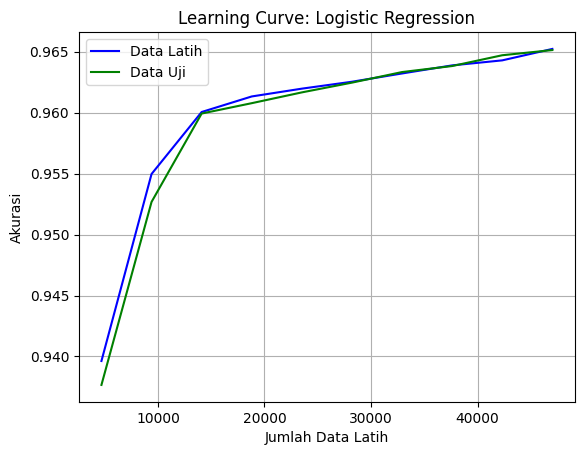

In [45]:
logreg_model = LogisticRegression(class_weight='balanced', random_state=42)
train_sizes, train_scores, test_scores = learning_curve(logreg_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Data Latih', color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Data Uji', color='green')

plt.title('Learning Curve: Logistic Regression')
plt.xlabel('Jumlah Data Latih')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.show()

Disimpulkan bahwa Model Logistic Regression sudah baik, **tidak overfitting maupun underfitting**, karena akurasi data latih (0.9651) dan uji (0.9650) hampir sama. Setelah tuning, performa meningkat sedikit (0.9715), menunjukkan model lebih optimal dan lebih meningkatkan keseimbangan prediksi.

#### Identifikasi Support Vector Machine

**Kelemahan Model** Akurasi tinggi, tapi awalnya ada sedikit gap antara data latih dan uji.

**Precision atau Recall Rendah**, Tidak ada yang terlalu rendah, precision dan recall cukup seimbang.


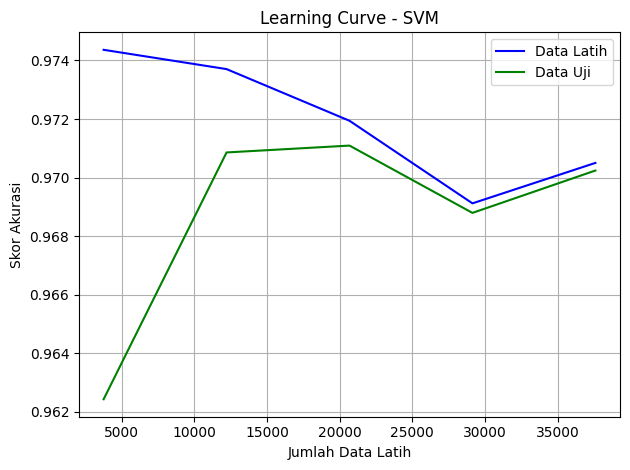

In [46]:
svm_model = SVC(kernel='linear', random_state=42)
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Data Latih', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Data Uji', color='green')

plt.title('Learning Curve - SVM')
plt.xlabel('Jumlah Data Latih')
plt.ylabel('Skor Akurasi')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

Awalnya ada overfitting (gap antara data latih dan uji), tapi setelah tuning, model lebih seimbang, performa meningkat (97.57% akurasi), model lebih optimal dan generalisasi lebih baik. Dan tidak terjadi overfitting dan underfitting lagi.

### 3. Rekomendasi Lanjutan

#### 1. Visualisasi Prediksi 10 Top Produk oleh Logistic Regression

In [47]:
logreg_model.fit(X, y)
product_df['popular'] = logreg_model.predict(X)
category_popularity_logreg = product_df.groupby(['product_category_name_english', 'popular']).size().unstack(fill_value=0)
top_10_categories_logreg = category_popularity_logreg['2'].sort_values(ascending=False).head(10)

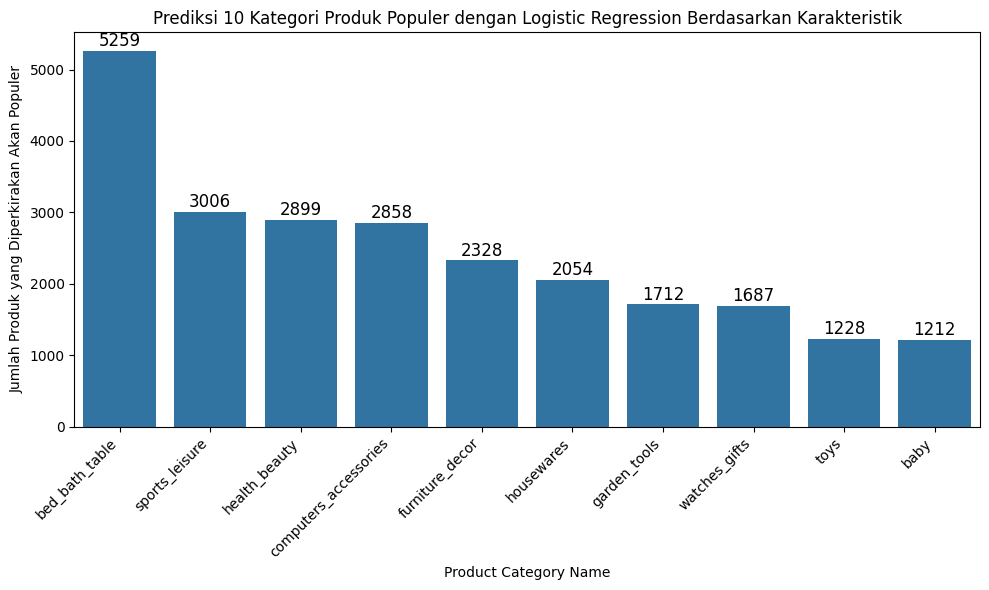

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories_logreg.index, y=top_10_categories_logreg.values)

for index, value in enumerate(top_10_categories_logreg.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Prediksi 10 Kategori Produk Populer dengan Logistic Regression Berdasarkan Karakteristik')
plt.xlabel('Product Category Name')
plt.ylabel('Jumlah Produk yang Diperkirakan Akan Populer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2. Visualisasi Prediksi 10 Top Produk oleh Support Vector Machine

In [49]:
svm_model.fit(X, y)
product_df['popular'] = svm_model.predict(X)
category_popularity_svm = product_df.groupby(['product_category_name_english', 'popular']).size().unstack(fill_value=0)
top_10_categories_svm = category_popularity_svm['2'].sort_values(ascending=False).head(10)

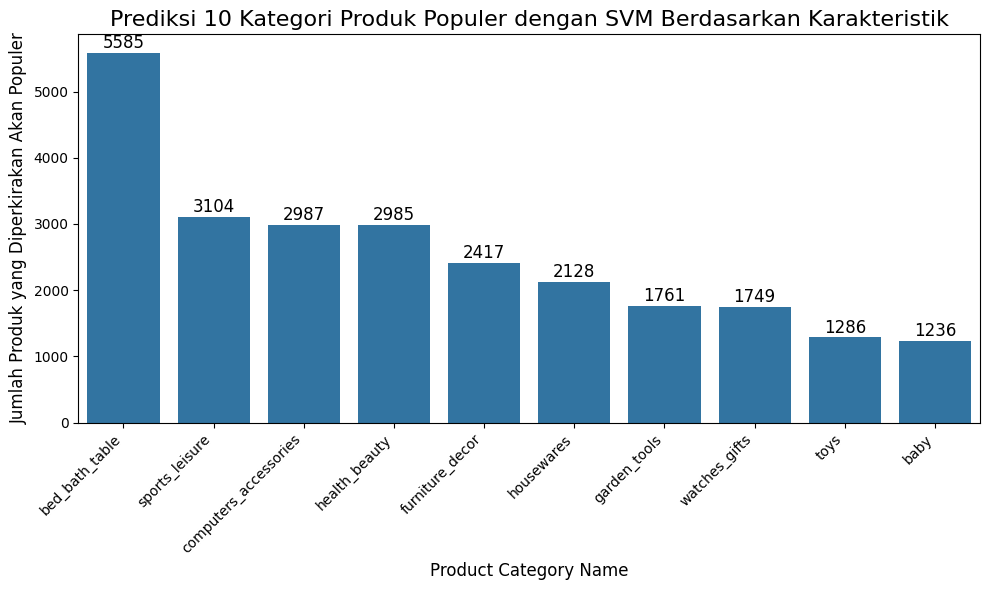

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories_svm.index, y=top_10_categories_svm.values)

for index, value in enumerate(top_10_categories_svm.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Prediksi 10 Kategori Produk Populer dengan SVM Berdasarkan Karakteristik', fontsize=16)
plt.xlabel('Product Category Name', fontsize=12)
plt.ylabel('Jumlah Produk yang Diperkirakan Akan Populer', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 3. Rekomendasi Kedepannya

* Perluas dataset agar model bisa belajar lebih banyak pola dan meningkatkan generalisasi.
* Coba teknik tuning lebih lanjut seperti Grid Search atau Bayesian Optimization untuk hasil lebih optimal.
* Uji model lain seperti Random Forest atau XGBoost untuk membandingkan performa dengan SVM dan Logistic Regression.